# Configurações iniciais

In [44]:
import pandas as pd
import seaborn as sns

In [45]:
dados = pd.read_csv('/tips.csv')

In [46]:
dados['%'] = (100*dados.tip/dados['total_bill']).round(2)

# Traduzindo o DataFrame

In [47]:
dados_traduzido = dados.rename(columns={'total_bill':'valor pago', 'tip':'gorjeta',
                      'dessert':'sobremesa', 'time':'refeição', 'size':'quantidade de pessoa',
                      'day':'dia'})

dados_traduzido.sobremesa = dados_traduzido['sobremesa'].map({'No':'Não','Yes':'Sim'});

dados_traduzido.dia = dados_traduzido.dia.map({'Sun':'Domingo', 'Sat':'Sábado', 
                                               'thur':'Quinta', 'Fri':'Sexta'})

dados_traduzido.refeição = dados_traduzido.refeição.map({'Dinner':'Jantar', 'Lunch':'Almoço'})

# 1. Gorjeta x Valor Pago

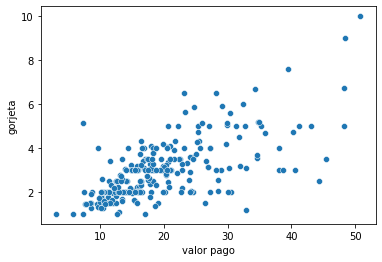

In [48]:
sns.scatterplot(x=dados_traduzido['valor pago'], y=dados_traduzido.gorjeta)

*Geralmente, conforme o valor total aumenta, as gorjetas são maiores*


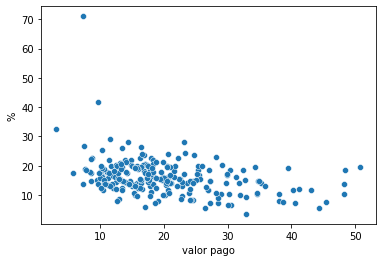

In [49]:
sns.scatterplot(x=dados_traduzido['valor pago'], y=dados_traduzido['%'])

*Não há uma clara relação entre a porcentagem paga como gorjeta c e o valor total*


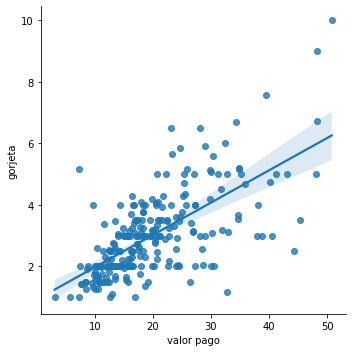

In [50]:
sns.lmplot(x='valor pago', y='gorjeta', data=dados_traduzido)

# 2. Gorjeta x Sobremesa

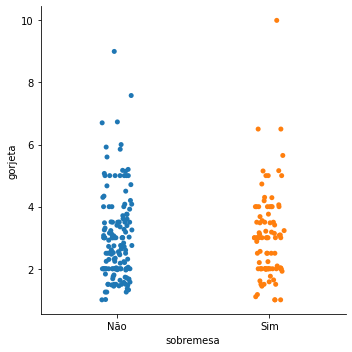

In [51]:
sns.catplot(x='sobremesa', y='gorjeta',  data=dados_traduzido)

*Não há claras evidências de relações entre as variávies*

In [52]:
dados_traduzido[dados_traduzido['sobremesa']=='Sim']['%'].describe()

count    93.000000
mean     16.319140
std       8.511748
min       3.560000
25%      10.680000
50%      15.380000
75%      19.510000
max      71.030000
Name: %, dtype: float64

In [53]:
dados_traduzido[dados_traduzido['sobremesa']=='Não']['%'].describe()

count    151.000000
mean      15.932318
std        3.990701
min        5.680000
25%       13.690000
50%       15.560000
75%       18.500000
max       29.200000
Name: %, dtype: float64

#3. Gorjeta x Dia da Semana

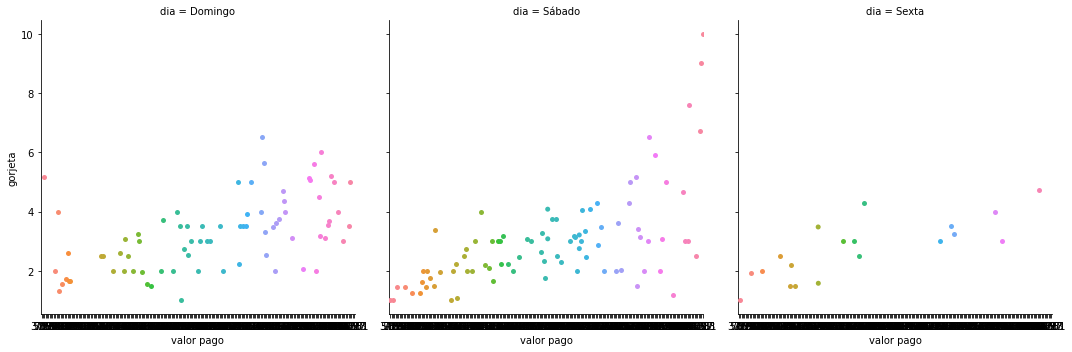

In [54]:
sns.catplot(x='valor pago', y='gorjeta', col='dia', data=dados_traduzido)

*Nos finais de semana, há mais clientes. Logo, a gorjeta arrecadada tende a ser maior*

In [55]:
dados_traduzido[dados_traduzido['dia']=='Sábado']['gorjeta'].describe()

count    87.000000
mean      2.993103
std       1.631014
min       1.000000
25%       2.000000
50%       2.750000
75%       3.370000
max      10.000000
Name: gorjeta, dtype: float64

In [56]:
dados_traduzido[dados_traduzido['dia']=='Domingo']['gorjeta'].describe()

count    76.000000
mean      3.255132
std       1.234880
min       1.010000
25%       2.037500
50%       3.150000
75%       4.000000
max       6.500000
Name: gorjeta, dtype: float64

*Nos sábados, há um maior volume de cliente. Contudo, os valores de gorjeta oscilam mais.
Além disso, nos domingos, a média das gorjetas é maior*

In [57]:
# calculando o valor total obtido em cada um dos dias. 
soma_domingo = dados_traduzido[dados_traduzido['dia']=='Domingo']['gorjeta'].sum().round(2)
soma_sabado = dados_traduzido[dados_traduzido['dia']=='Sábado']['gorjeta'].sum().round(2)
soma_sexta = dados_traduzido[dados_traduzido['dia']=='Sexta']['gorjeta'].sum().round(2)

print('Gorjeta Total por dia em R$ \n\n \
       Sexta : {} \n \
       Sábado : {} \n \
       Domingo : {}'.format(soma_sexta, soma_sabado, soma_domingo))

Gorjeta Total por dia em R$ 

        Sexta : 51.96 
        Sábado : 260.4 
        Domingo : 247.39


*Mesmo com média menor, sábado ainda é o dia que arrecada maior valor em gorjetas*

In [58]:
dados_traduzido.groupby('dia').describe()
#descrição detalhada

valor pago                                                             \
             count       mean       std   min      25%    50%      75%    max   
dia                                                                             
Domingo       76.0  21.410000  8.832122  7.25  14.9875  19.63  25.5975  48.17   
Sexta         19.0  17.151579  8.302660  5.75  12.0950  15.38  21.7500  40.17   
Sábado        87.0  20.441379  9.480419  3.07  13.9050  18.24  24.7400  50.81   

        gorjeta            ... quantidade de pessoa          %             \
          count      mean  ...                  75%  max count       mean   
dia                        ...                                              
Domingo    76.0  3.255132  ...                  4.0  6.0  76.0  16.689605   
Sexta      19.0  2.734737  ...                  2.0  4.0  19.0  16.991579   
Sábado     87.0  2.993103  ...                  3.0  5.0  87.0  15.314598   

                                                        
              std    min     25%    50%     75%    max  
dia                                                     
Domingo  8.473462   5.94  12.000  16.11  18.785  71.03  
Sexta    4.766803  10.36  13.375  15.56  19.665  26.35  
Sábado   5.129187   3.56  12.385  15.18  18.825  32.57  

[3 rows x 32 columns]